<a href="https://colab.research.google.com/github/Crossme0809/langchain-tutorials/blob/main/Langchain_Semnatic_Serach_Pinecone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

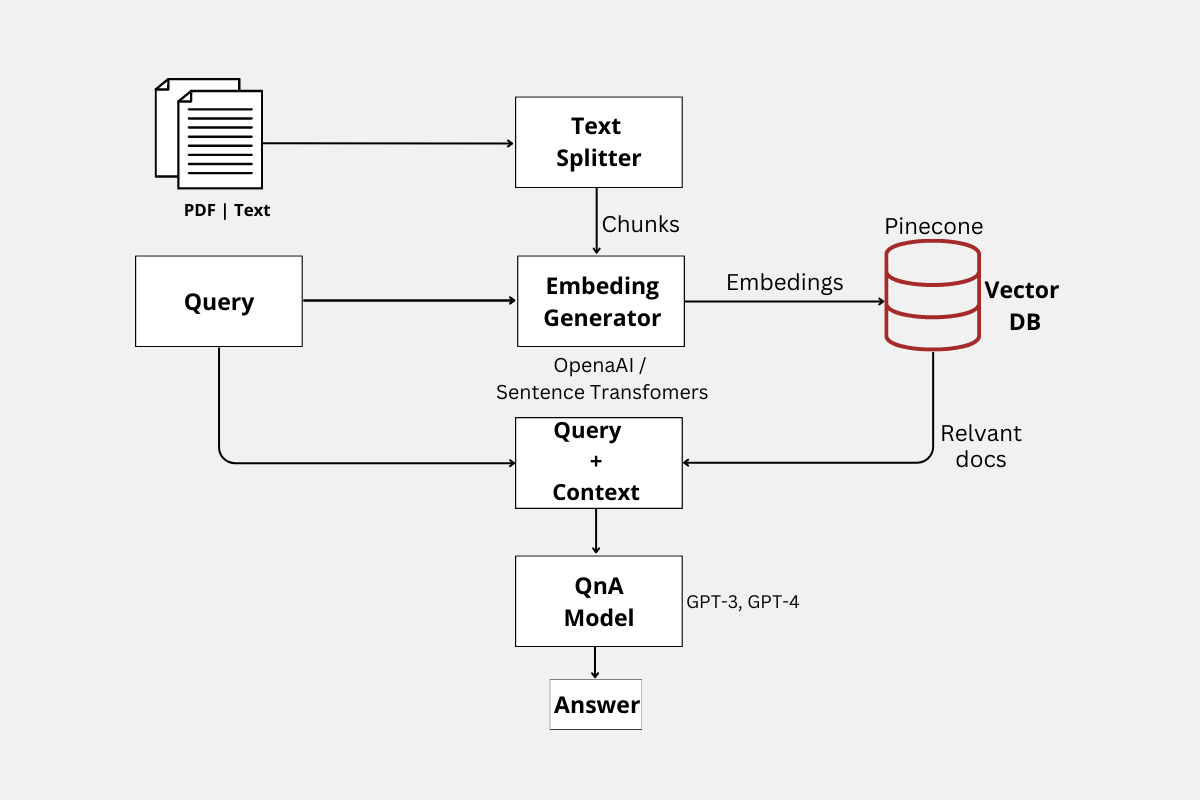

In [25]:
from PIL import Image               # to load images
from IPython.display import display # to display images

pil_im = Image.open('/content/langchain_and_pinecone.png')
display(pil_im)

In [28]:
!pip install --upgrade langchain openai  -q

In [29]:
import os
os.environ["OPENAI_API_KEY"] = "your-openai-api-key"

In [30]:
!pip install unstructured -q
!pip install unstructured[local-inference] -q
!pip install detectron2@git+https://github.com/facebookresearch/detectron2.git@v0.6#egg=detectron2 -q

  Preparing metadata (setup.py) ... done


In [31]:
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree       
Reading state information... Done
poppler-utils is already the newest version (0.86.1-0ubuntu1.1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


https://python.langchain.com/en/latest/modules/indexes/document_loaders/examples/directory_loader.html

In [29]:
!pip show pillow
!pip uninstall pillow
!pip install --upgrade pillow==6.2.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.8/37.8 MB 30.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pillow: filename=Pillow-6.2.2-cp310-cp310-linux_x86_64.whl size=1234853 sha256=2d6f3dfd651640da6f63d6604fc19fecf0de7f97b5b845a073285e7fad619f66
  Stored in directory: /root/.cache/pip/wheels/4c/f0/14/4aa5f8e874837feee51602ab9acc027d9186e7f3cd6752cb89
Successfully built pillow
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bokeh 2.4.3 requires pillow>=7.1.0, but you have pillow 6.2.2 which is incompatible.
detectron2 0.6 requires Pillow>=7.1, but you have pillow 6.2.2 which is incompatible.
dopamine-rl 4.0.6 requires Pillow>=7.0.0, but you have pillow 6.2.2 which is incompatible.
imageio 2.25.1 requires pillow>=8.3.2, but yo

In [1]:
from langchain.document_loaders import DirectoryLoader

directory = '/content/data'

def load_docs(directory):
  loader = DirectoryLoader(directory)
  documents = loader.load()
  return documents

documents = load_docs(directory)
len(documents)

1

https://python.langchain.com/en/latest/modules/indexes/text_splitters/getting_started.html

In [2]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

def split_docs(documents,chunk_size=1000,chunk_overlap=20):
  text_splitter = RecursiveCharacterTextSplitter(chunk_size=chunk_size, chunk_overlap=chunk_overlap)
  docs = text_splitter.split_documents(documents)
  return docs

docs = split_docs(documents)
print(len(docs))

33


In [3]:
print(docs[0].page_content)

本教程将简要介绍如何使⽤ LangChain 构建端到端语⾔模型应⽤程序。

安装

⾸先，使⽤以下命令安装 LangChain：

pip install langchain pip install langchain

# or # or

conda-forge conda install langchain -c-c conda-forge conda install langchain

环境设定

使⽤ LangChain 通常需要与⼀个或多个模型提供程序、数据存储、 API 等集成。

对于这个例⼦，我们将使⽤ OpenAI 的 API，所以我们⾸先需要安装他们的 SDK：

pip install openai pip install openai

然后我们需要在终端设置环境变量：

export OPENAI_API_KEY export

"..." OPENAI_API_KEY=="..."

或者，你可以在 Jupiter 教程(或 Python 脚本)内部完成：

import osos import

osos..environ

environ[["OPENAI_API_KEY"

"..." "OPENAI_API_KEY"] ] == "..."

构建语⾔模型（Language Model）应⽤程序：LLM

现在我们已经安装了 LangChain 并设置了我们的环境，我们可以开始构建我们的语⾔模型应⽤程序了。

LangChain 提供了许多可⽤于构建语⾔模型应⽤程序的模块。

模块可以组合起来创建更复杂的应⽤程序，或者单独⽤于简单的应⽤程序。

示例代码

# # 导⼊导⼊ llm

llm 包装器包装器

from langchain from

langchain..llms

llms import

OpenAI import OpenAI

import osos import

# # 配置你的

配置你的OpenAI key

和代理地址 OpenAI key和代理地址

osos..environ

environ[["OPENAI_API_KEY"

"***" "OPENAI_API_KEY"] ] == "***"

osos..environ

environ[["OPENAI_API_BASE"


In [4]:
print(docs[5].page_content)

具体代码如下：

# # 导⼊导⼊ agents

agents 包装器包装器

from langchain from

langchain..agents

agents import

load_tools import load_tools

from langchain from

langchain..agents

agents import

initialize_agent import initialize_agent

from langchain from

langchain..agents

agents import

AgentType import AgentType

# # 导⼊导⼊ llm

llm 包装器包装器

from langchain from

langchain..llms

llms import

OpenAI import OpenAI

import osos import

# # 配置你的

配置你的OpenAI key

和代理地址 OpenAI key和代理地址

osos..environ

environ[["OPENAI_API_KEY"

"***" "OPENAI_API_KEY"] ] == "***"

osos..environ

environ[["OPENAI_API_BASE"

"http://{your proxy url}/v1" "OPENAI_API_BASE"] ] == "http://{your proxy url}/v1"

# # 设置代理接⼝的

设置代理接⼝的apikey https://serpapi.com/ apikey https://serpapi.com/

osos..environ

environ[["SERPAPI_API_KEY"

"***" "SERPAPI_API_KEY"] ] == "***"

⾸先，让我们加载将⽤于控制代理的语⾔模型。 # # ⾸先，让我们加载将⽤于控制代理的语⾔模型。

llmllm == OpenAI

OpenAI((temperature

temperature==00))

# # 接下来，让我们加载⼀些要使⽤的⼯具。请注意，


In [5]:
#requires for open ai embedding
!pip install tiktoken -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 19.7 MB/s eta 0:00:00


In [13]:
import openai
from langchain.embeddings.openai import OpenAIEmbeddings

embeddings = OpenAIEmbeddings(model="text-embedding-ada-002")

query_result = embeddings.embed_query("记忆内存")
len(query_result)

1536

In [14]:
!pip install pinecone-client -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.1/179.1 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.7/283.7 kB 13.9 MB/s eta 0:00:00


https://python.langchain.com/en/latest/modules/indexes/vectorstores/examples/pinecone.html

In [18]:
import pinecone
from langchain.vectorstores import Pinecone
# initialize pinecone
pinecone.init(
    api_key="pinecone api key",  # find at app.pinecone.io
    environment="env"  # next to api key in console
)

index_name = "langchain-demo"

index = Pinecone.from_documents(docs, embeddings, index_name=index_name)

In [21]:
def get_similiar_docs(query,k=2,score=False):
  if score:
    similar_docs = index.similarity_search_with_score(query,k=k)
  else:
    similar_docs = index.similarity_search(query,k=k)
  return similar_docs

query = "LangChain环境配置"
similar_docs = get_similiar_docs(query)
similar_docs

[Document(page_content='LLMChain 也可以⽤于聊天模型。 LLMChain\n\n示例代码\n\n# # 导⼊导⼊ langchain\n\nlangchain 相关包相关包\n\nfrom langchain from\n\nlangchain import\n\nLLMChain import LLMChain\n\nfrom langchain from\n\nlangchain..chat_models\n\nchat_models import\n\nChatOpenAI import ChatOpenAI\n\nfrom langchain from\n\nlangchain..prompts\n\nprompts..chat\n\nchat import\n\nimport ( (\n\nChatPromptTemplate\n\nChatPromptTemplate,,\n\nSystemMessagePromptTemplate\n\nSystemMessagePromptTemplate,,\n\nHumanMessagePromptTemplate\n\nHumanMessagePromptTemplate,,\n\n))\n\nimport osos import\n\n# # 配置你的\n\n配置你的OpenAI key\n\n和代理地址 OpenAI key和代理地址\n\nosos..environ\n\nenviron[["OPENAI_API_KEY"\n\n"***" "OPENAI_API_KEY"] ] == "***"\n\nosos..environ\n\nenviron[["OPENAI_API_BASE"\n\n"http://{your proxy url}/v1" "OPENAI_API_BASE"] ] == "http://{your proxy url}/v1"\n\nchat == ChatOpenAI chat\n\nChatOpenAI((temperature\n\ntemperature==00))\n\nsystem_template == ""你是⼀个乐于助⼈的助⼿，能把 system_template\n\n你是⼀个乐于助⼈的助⼿，能把{input_languag

In [23]:
from langchain.llms import OpenAI

model_name = "text-davinci-003"
# model_name = "gpt-3.5-turbo"
# model_name = "gpt-4"
llm = OpenAI(model_name=model_name)

https://python.langchain.com/en/latest/use_cases/question_answering.html

In [33]:
pip install langchain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
from langchain.chains.question_answering import load_qa_chain
chain = load_qa_chain(llm, chain_type="stuff")

def get_answer(query):
  similar_docs = get_similiar_docs(query)
  # print(similar_docs)
  answer =  chain.run(input_documents=similar_docs, question=query)
  return  answer

query = "如何安装LangChain"
get_answer(query)

' 使用pip install langchain或conda-forge conda install langchain -c conda-forge来安装LangChain。'

In [39]:
query = "管理LLM的提示"
get_answer(query)

' LLMChain 由 PromptTemplate 和 LLMLLM 组成，它接受用户输入，使用 PromptTemplate 对其进行格式化，然后将格式化后的响应传递给 LLMLLM 。'